## Section2 実装②
ここでは以下のページのECGによる波形データセットECG5000をRNNで学習し、分類を行う。

[ECC波形データセット] : (http://timeseriesclassification.com/description.php?Dataset=ECG5000)

このデータセットは、ECG(Electorocardiogram: 心電図)の計測値140時点分とその系列に対する分類(1～5)で1データとなっていて、全体で5000データが含まれる。

### 2.0 データの用意

ここで利用するデータセットはリポジトリに含まれていないので、上記リンクから"download this dataset"をクリックしてダウンロード。

ダウンロードしたデータセットはdataフォルダ内に配置する。配置したら、データセットの読み込みを行う。

arffという形式で保存されているので、spicy.io.loadaff関数でロードする。


In [2]:
%matplotlib inline

from scipy.io import arff
import numpy as np

dataset, meta = arff.loadarff('data/ECG5000_TEST.arff')

ds = np.asarray(dataset.tolist(), dtype=np.float32)
x_dataset = ds[:, :140]
y_dataset = np.asarray(ds[:,-1].tolist(), dtype=np.int8)-1

実際に表示してみる。

[0 0 0 0 0 0 0 0 0 0]


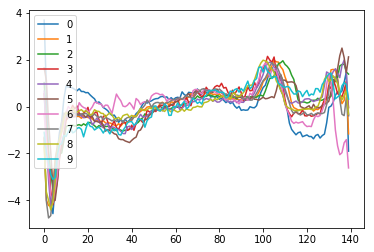

In [3]:
import matplotlib.pyplot as plt

N = 10
print(y_dataset[:N])
obj = plt.plot(x_dataset[:N].T)
plt.legend(obj, [str(n) for n in range(N)])

データを訓練用とテスト用に分割

In [4]:
# 訓練データとテストデータを分割（＋データの整形）

from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

x_train, x_test, y_train, y_test = train_test_split(x_dataset[:,:,np.newaxis], to_categorical(y_dataset), test_size=0.2, random_state=42)

C:\Users\yanor\Anaconda3\envs\matsuo\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


### 2.1 モデル構築
SimpleRNNを用いてモデルを構築する。

In [6]:
from keras.models import Sequential
from keras.layers import Dense, Activation, SimpleRNN

hid_dim = 10

# SimpleRNNにDenseを接続し、分類
model = Sequential()

model.add(SimpleRNN(hid_dim, input_shape=x_train.shape[1:])) # input_shape=(系列長T, x_tの次元), output_shape=(units(=hid_dim),)
model.add(Dense(y_train.shape[1], activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

### 2.2 モデルの学習

In [7]:
model.fit(x_train, y_train, epochs=50, batch_size=100, verbose=2, validation_split=0.2)

Train on 2880 samples, validate on 720 samples
Epoch 1/50
 - 4s - loss: 1.2141 - acc: 0.5285 - val_loss: 1.0907 - val_acc: 0.6819
Epoch 2/50
 - 4s - loss: 0.9464 - acc: 0.8156 - val_loss: 0.8710 - val_acc: 0.8764
Epoch 3/50
 - 2s - loss: 0.7457 - acc: 0.9062 - val_loss: 0.7107 - val_acc: 0.8917
Epoch 4/50
 - 2s - loss: 0.6077 - acc: 0.9069 - val_loss: 0.6158 - val_acc: 0.8819
Epoch 5/50
 - 2s - loss: 0.5290 - acc: 0.9038 - val_loss: 0.5683 - val_acc: 0.8903
Epoch 6/50
 - 2s - loss: 0.4841 - acc: 0.9066 - val_loss: 0.5300 - val_acc: 0.8889
Epoch 7/50
 - 2s - loss: 0.4497 - acc: 0.9069 - val_loss: 0.5056 - val_acc: 0.8875
Epoch 8/50
 - 2s - loss: 0.4300 - acc: 0.9069 - val_loss: 0.4887 - val_acc: 0.8833
Epoch 9/50
 - 2s - loss: 0.4173 - acc: 0.9052 - val_loss: 0.4751 - val_acc: 0.8875
Epoch 10/50
 - 3s - loss: 0.4061 - acc: 0.9056 - val_loss: 0.4608 - val_acc: 0.8889
Epoch 11/50
 - 4s - loss: 0.3932 - acc: 0.9073 - val_loss: 0.4551 - val_acc: 0.8861
Epoch 12/50
 - 4s - loss: 0.3811 - acc

### 2.3 モデルによる分類精度の評価

In [8]:
# 性能評価
score = model.evaluate(x_test, y_test, verbose=0)
print('test_loss:', score[0])
print('test_acc:', score[1])

test_loss: 0.3032925510406494
test_acc: 0.9044444444444445


### 2.4 モデルの可視化